#Airbnb price category prediction

##Problem Formulation
Predict the listing price based on the listing characteristics, in this way to optimize user experience and lower the bar to be a new host.


##Data Loading and Exploring

In [1]:
!pip3 uninstall googletrans
!pip3 install googletrans==3.1.0a0

Found existing installation: googletrans 3.1.0a0
Uninstalling googletrans-3.1.0a0:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.7/dist-packages/googletrans-3.1.0a0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/googletrans/*
Proceed (y/n)? y
  Successfully uninstalled googletrans-3.1.0a0
  Using cached googletrans-3.1.0a0-py3-none-any.whl


In [2]:
#import libiraries
import os
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np
from ast import literal_eval
from bokeh.io import output_notebook
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import pickle
import sklearn
import holoviews as hv
import nltk 
from bokeh.io import output_notebook
output_notebook()
from pathlib import Path
from textblob import TextBlob
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#read train and test data
data = pd.read_csv('/content/drive/MyDrive/train_xy.csv')
test= pd.read_csv('/content/drive/MyDrive/test_x.csv')

In [4]:
#display train data
data

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [5]:
#display the no. of nulls in each columns
data.isnull().sum().sort_values(ascending=False)

summary    301
image        0
type         0
price        0
dtype: int64

In [6]:
#display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [7]:
#check if there is duplicate in data
data.duplicated().sum()

0

##Data Cleaning and Preprocessing

In [8]:
#data['summary']=data.summary.fillna("IGNORE TEXT")
data.dropna(inplace=True)

In [9]:
#fill nulls with back values
#data['summary']=data['summary'].fillna(method='bfill')

In [10]:
#make sure that the null has been removed
data.isnull().sum().sort_values(ascending=False)

summary    0
image      0
type       0
price      0
dtype: int64

In [11]:
data

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


After exploring the data we found that the data include french sentences and english one so we'll translate all text data to english language to be more easier to classify.

In [12]:
from googletrans import Translator
translator = Translator()

In [13]:
def t__(text_):
  return translator.translate(text_).text

In [14]:
data['summary'] = data['summary'].apply(t__)
test['summary'] = test['summary'].apply(t__)

In [15]:
#display data after translation
data['summary']

0       Spacious, sunny and cozy modern apartment in t...
1       Located in one of the most vibrant and accessi...
2       Pretty and cozy accommodation 10 minutes from ...
3       Beautiful and spacious (1076 sc ft, / 100 mc) ...
4       Very large ''rustic'' and very pleasant apartm...
                              ...                        
7622    A large 4 and 1/2 apartment, all inclusive, we...
7623    Magnificent condo directly on the river. You w...
7624    This apartment is perfect for anyone visiting ...
7625    It is a cozy ,clean ,and comfortable apartment...
7626    Modern country style (newly-renovated); open c...
Name: summary, Length: 7326, dtype: object

In [16]:
!pip install langdetect

     |████████████████████████████████| 981 kB 12.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=a089f757d3f3abe45f5334183125baf26d1cc6bd63108c01ae4380e15eb34679
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [17]:
from langdetect import detect
def det_lang(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

In [18]:
data['new'] = data['summary'].apply(det_lang)
data['new']

0       en
1       en
2       en
3       en
4       en
        ..
7622    en
7623    en
7624    en
7625    en
7626    en
Name: new, Length: 7326, dtype: object

In [19]:
data['new'].value_counts()

en    7304
fr       6
de       5
ro       3
af       2
it       1
da       1
es       1
vi       1
no       1
sv       1
Name: new, dtype: int64

We see that data include outliers and noise, so we'll clean it, lemmatize some words and remove stop words.

In [20]:
from bokeh.io import output_notebook
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import pickle
import sklearn
import holoviews as hv
import nltk 
from bokeh.io import output_notebook
output_notebook()
from pathlib import Path
from textblob import TextBlob
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer() 
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))


def clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no lemmatizing, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            lemmatizer.lemmatize(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Clean summary in train data
data["summary"] = data.loc[data["summary"].str.len() > 0, "summary"]
data["summary"] = data["summary"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x)

# Clean summary in test data
test["summary"] = test.loc[test["summary"].str.len() > 0, "summary"]
test["summary"] = test["summary"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x)

In [22]:
#display train and test data after cleaning
data['summary'], test['summary']

(0       spacious sunny cozy modern apartment heart mon...
 1       located one vibrant accessible location downto...
 2       pretty cozy accommodation minute downtown mont...
 3       beautiful spacious sc ft mc condo th floor wes...
 4       large rustic pleasant apartment rent nice neig...
                               ...                        
 7622    large apartment inclusive well lit located qui...
 7623    magnificent condo directly river sleep song wi...
 7624    apartment perfect anyone visiting city located...
 7625    cozy clean comfortable apartment heart downtow...
 7626    modern country style newly renovated open conc...
 Name: summary, Length: 7326, dtype: object,
 0       charming warm house ready host multi cultural ...
 1       room spacious bright apartment shared three ro...
 2       large comfortable room located basement house ...
 3       near metro orange line minute walking ahuntsic...
 4       bright appartment cosy separate bedroom queen ...
           

In [23]:
from sklearn.model_selection import train_test_split

#convert labels to categories
data['type'] = data.type.astype('category').cat.codes
len_type = len(data.type.unique())
len_price = len(data.price.unique())

# split data (training/validation set)
data_train, data_test = train_test_split(data, test_size=0.2, random_state=1024)

In [24]:
# preprocess image data
import os

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64, 2))
    return arr


# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(data_train.image)])

# loading overview: (force convert some of the non-string cell to string)
x_train_text = data_train.summary.astype('str')

# get type(label)
y_train_type = data_train.type

# get price
y_train_price = data_train.price

  0%|          | 0/5860 [00:00<?, ?it/s]

In [25]:
#display data after splitting
x_train_text,y_train_type, y_train_price

(7106    fully geared kitchen near major subway line pl...
 5556    house located lovely notre dame de grâce neigh...
 1822    room rent part bedroom apartment cote de neige...
 5215    live apartment côte de neiges near park kent u...
 604     warm bed sofa bed well located close parc bald...
                               ...                        
 2773    good large app sunny bedroom person well locat...
 2645    beautiful bedroom bathroom condo charming neig...
 7032    bedroom apartment patio quiet apartment buildi...
 949     nice room closet hang store thing plenty light...
 6324    newly renovated apartment heart vibrant platea...
 Name: summary, Length: 5860, dtype: object, 7106     1
 5556    22
 1822     1
 5215     1
 604      1
         ..
 2773     1
 2645    10
 7032    10
 949     22
 6324    10
 Name: type, Length: 5860, dtype: int8, 7106    1
 5556    0
 1822    0
 5215    0
 604     0
        ..
 2773    0
 2645    1
 7032    1
 949     0
 6324    1
 Name: price, L

In [26]:
# preprocess text data

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint

vocab_size = 80000
max_len = 300


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text)

def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
      
    )
    

# padding is done inside: 
x_train_text_id = _preprocess(x_train_text)

print(x_train_text_id)

[[  34 4106   20 ...    0    0    0]
 [  99    5  268 ...    0    0    0]
 [   6  232  283 ...    0    0    0]
 ...
 [  11    1  437 ...    0    0    0]
 [  76    6  424 ...    0    0    0]
 [ 207   69    1 ...    0    0    0]]


Now data is ready to train

##Trial 1
Multi-modality learning with Multi-objective learning and Conv2D.

This is the first trial and I have no expectations yet.

Let's try.

In [27]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,LSTM ,MultiHeadAttention,Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense, SpatialDropout1D
from keras.layers import SimpleRNN
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

# image part 
# simple conv2D
cov = Conv2D(64, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 64)   32832       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     24000000    ['input_1[0][0]']                
                                                                                              

In [28]:
#let's train model
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1
)

Epoch 1/25
147/147 [==============================] - 62s 408ms/step - loss: 1.1166 - price_loss: 0.8647 - type_loss: 1.3685 - price_sparse_categorical_accuracy: 0.6143 - type_sparse_categorical_accuracy: 0.7464 - val_loss: 0.9457 - val_price_loss: 0.8457 - val_type_loss: 1.0456 - val_price_sparse_categorical_accuracy: 0.6032 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 2/25
147/147 [==============================] - 54s 365ms/step - loss: 0.9127 - price_loss: 0.8268 - type_loss: 0.9986 - price_sparse_categorical_accuracy: 0.6237 - type_sparse_categorical_accuracy: 0.7587 - val_loss: 0.9457 - val_price_loss: 0.8398 - val_type_loss: 1.0515 - val_price_sparse_categorical_accuracy: 0.6032 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 3/25
147/147 [==============================] - 55s 377ms/step - loss: 0.9069 - price_loss: 0.8189 - type_loss: 0.9948 - price_sparse_categorical_accuracy: 0.6237 - type_sparse_categorical_accuracy: 0.7587 - val_loss: 0.9306 - val_price_loss: 0

In [29]:
def results_viz(history):

  # generate a figure containing 3 plots displayed horizontally
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
  fig.suptitle('Model Results')
  
  # first we display the training price accuracy vs. the validation price accuracy
  ax1.plot(history.history['price_sparse_categorical_accuracy'])
  ax1.plot(history.history['val_price_sparse_categorical_accuracy'])
  ax1.set_title('price accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train_price', 'validation_price'], loc='upper left')

  # same with the other specified accuracy metric, type accuracy
  ax2.plot(history.history['type_sparse_categorical_accuracy'])
  ax2.plot(history.history['val_type_sparse_categorical_accuracy'])
  ax2.set_title('type accuracy')
  ax2.set_ylabel('accuracy')
  ax2.set_xlabel('epoch')
  ax2.legend(['train_type', 'validation_type'], loc='upper left')

  # on the last axis, we plot the training loss against the validation loss (w.r.t. price and type combined)
  ax3.plot(history.history['loss'])
  ax3.plot(history.history['val_loss'])
  ax3.set_title('model loss')
  ax3.set_ylabel('loss')
  ax3.set_xlabel('epoch')
  ax3.legend(['train', 'validation'], loc='upper left')

  plt.show() # display the figure


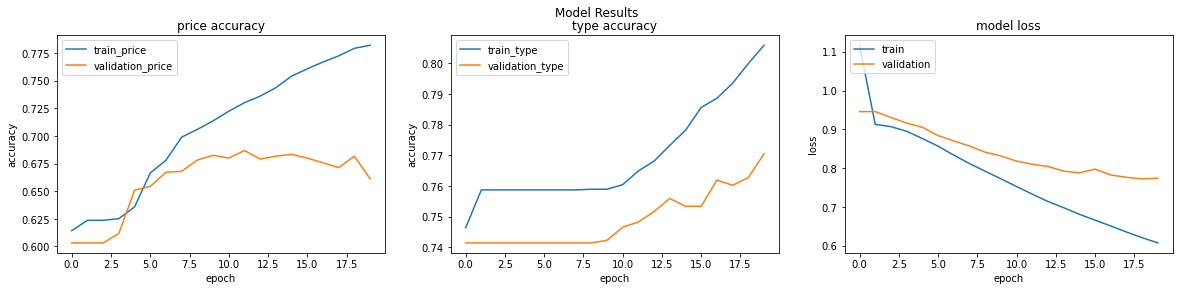

In [30]:
results_viz(history)

Score on kaggle is: 0.67798

In [31]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(test.image)])

# loading overview: (force convert some of the non-string cell to string)
x_test_text = _preprocess(test.summary.astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [32]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    })

# probabilities
type_predicted = y_predict['type']
type_category_predicted = np.argmax(type_predicted, axis=1)

price_predicted = y_predict['price']
price_category_predicted = np.argmax(price_predicted, axis=1)

price_predicted,price_category_predicted

(array([[0.48462126, 0.40970656, 0.10567216],
        [0.88959813, 0.08768424, 0.02271762],
        [0.78613454, 0.14629127, 0.0675742 ],
        ...,
        [0.6909975 , 0.256865  , 0.05213744],
        [0.9398172 , 0.03892314, 0.02125959],
        [0.635276  , 0.30364206, 0.06108187]], dtype=float32),
 array([0, 0, 0, ..., 0, 0, 0]))

In [33]:
#  (if for kaggle competition and it is about price prediction)
pd.DataFrame({'id': test.id,'price': price_category_predicted}).to_csv('sample_submission.csv', index=False)

Good result but I expect better for next trials.

##Trail 2
In this trial we'll use LSTM and I expect higher score and I'll add dropout layer too.

Multimodality with multi object learning.

Dropout should reduce overfitting.

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,LSTM
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense, SpatialDropout1D,Dropout
from keras.layers import SimpleRNN
from keras import regularizers
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 250)(in_text)
spatial=SpatialDropout1D(0.2)(embedded)
lstm=LSTM(64,dropout=0.2,return_sequences=True)(spatial)
averaged = tf.reduce_mean(lstm, axis=1)

#images part
cov = Conv2D(64, (8, 8),activation='relu',kernel_regularizer=regularizers.l2(0.01),kernel_initializer='he_uniform')(in_image)
pl = MaxPool2D(pool_size=(8, 8))(cov)#,strides=(1,1),padding='same')(cov) 
d1=Dropout(0.25)(pl)
cov2 = Conv2D(64, (4, 4),kernel_regularizer=regularizers.l2(0.01),activation='relu')(d1)
p2 = MaxPool2D((4, 4))(cov2)#,strides=(1,1),padding='same')(cov2)
d2=Dropout(0.25)(p2)
flattened = Flatten()(d2)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_2 = keras.Model(
    inputs={'summary': in_text,'image': in_image},
    outputs={'type': p_type,'price': p_price,})

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model_2.compile(
    optimizer=Adam(lr=0.001),
    loss={'type': 'sparse_categorical_crossentropy','price': 'sparse_categorical_crossentropy'},
    loss_weights={'type': 0.7,'price': 0.3},
    metrics={'type': ['SparseCategoricalAccuracy'],'price': ['SparseCategoricalAccuracy'],}
    )

model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 57, 57, 64)   8256        ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 7, 7, 64)    0           ['conv2d_1[0][0]']               
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
history = model_2.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,)],
    verbose=1
)

Epoch 1/20
293/293 [==============================] - 100s 332ms/step - loss: 1.3429 - price_loss: 0.8429 - type_loss: 1.1159 - price_sparse_categorical_accuracy: 0.6163 - type_sparse_categorical_accuracy: 0.7517 - val_loss: 0.9672 - val_price_loss: 0.8375 - val_type_loss: 1.0145 - val_price_sparse_categorical_accuracy: 0.6032 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 2/20
293/293 [==============================] - 97s 330ms/step - loss: 0.9155 - price_loss: 0.8234 - type_loss: 0.9537 - price_sparse_categorical_accuracy: 0.6233 - type_sparse_categorical_accuracy: 0.7583 - val_loss: 0.9540 - val_price_loss: 0.8474 - val_type_loss: 0.9997 - val_price_sparse_categorical_accuracy: 0.6015 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 3/20
293/293 [==============================] - 97s 331ms/step - loss: 0.8986 - price_loss: 0.8311 - type_loss: 0.9275 - price_sparse_categorical_accuracy: 0.6175 - type_sparse_categorical_accuracy: 0.7532 - val_loss: 0.9421 - val_price_loss: 

Score on kaggle is 0.62038

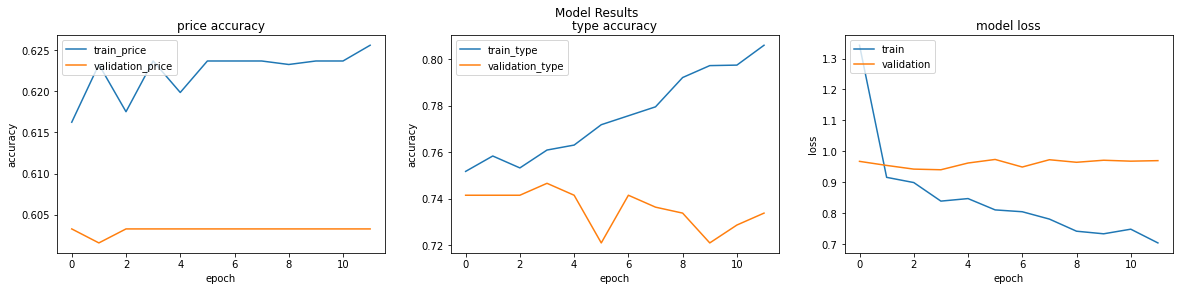

In [36]:
results_viz(history)

In [37]:
# we can do prediction on training set
y_predict_2 = model_2.predict({'summary': x_test_text,'image': x_test_image})

# probabilities
type_predicted_2 = y_predict_2['type']
type_category_predicted_2 = np.argmax(type_predicted_2, axis=1)

price_predicted_2 = y_predict_2['price']
price_category_predicted_2 = np.argmax(price_predicted_2, axis=1)
price_predicted_2,price_category_predicted_2

(array([[0.53186125, 0.324633  , 0.1435057 ],
        [0.7460283 , 0.21699506, 0.03697661],
        [0.5822564 , 0.3133435 , 0.10440014],
        ...,
        [0.7249884 , 0.23119465, 0.04381698],
        [0.52649456, 0.32795218, 0.14555326],
        [0.67876345, 0.2664708 , 0.05476579]], dtype=float32),
 array([0, 0, 0, ..., 0, 0, 0]))

In [38]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame({'id': test.id,'price': price_category_predicted_2}).to_csv('sample_submission_LSTM.csv', index=False)

Score is not better, not like my expectations, there's overfitting.

##Trial 3
Using BiDirectional learning with text input only and Multi-objective learning.

In [39]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,LSTM,GRU
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense, SpatialDropout1D,Dropout
from keras.layers import SimpleRNN
from keras import regularizers
# here we have one input. one for text.
in_text = keras.Input(batch_shape=(None, max_len))

# text part
# simple average of embedding
embedded = keras.layers.Embedding(tokenizer.num_words, 250)(in_text)
spatial= SpatialDropout1D(0.2)(embedded)
bi = Bidirectional(GRU(128,dropout=0.2, recurrent_regularizer='l2'))(spatial)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(bi)
p_price = Dense(len_price, activation='softmax', name='price')(bi)

# define model input/output using keys.
model_3 = keras.Model(
    inputs={'summary': in_text},
    outputs={'type': p_type,'price': p_price,},
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model_3.compile(
    optimizer=Adam(lr=0.01),
    loss={'type': 'sparse_categorical_crossentropy','price': 'sparse_categorical_crossentropy'},
    loss_weights={'type': 0.5,'price': 0.5},
    metrics={'type': ['SparseCategoricalAccuracy'],'price': ['SparseCategoricalAccuracy'],},)

model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 300, 250)     20000000    ['input_5[0][0]']                
                                                                                                  
 spatial_dropout1d_1 (SpatialDr  (None, 300, 250)    0           ['embedding_2[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 bidirectional (Bidirectional)  (None, 256)          291840      ['spatial_dropout1d_1[0][0]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
history = model_3.fit(
    x={
        'summary': x_train_text_id    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,)],
    verbose=1
)

Epoch 1/30
293/293 [==============================] - 156s 521ms/step - loss: 0.9706 - price_loss: 0.8211 - type_loss: 0.9613 - price_sparse_categorical_accuracy: 0.6218 - type_sparse_categorical_accuracy: 0.7594 - val_loss: 0.8416 - val_price_loss: 0.7733 - val_type_loss: 0.8348 - val_price_sparse_categorical_accuracy: 0.6399 - val_type_sparse_categorical_accuracy: 0.7568
Epoch 2/30
293/293 [==============================] - 155s 528ms/step - loss: 0.7730 - price_loss: 0.6982 - type_loss: 0.7132 - price_sparse_categorical_accuracy: 0.7041 - type_sparse_categorical_accuracy: 0.7991 - val_loss: 0.9364 - val_price_loss: 0.8718 - val_type_loss: 0.8427 - val_price_sparse_categorical_accuracy: 0.6263 - val_type_sparse_categorical_accuracy: 0.7765
Epoch 3/30
293/293 [==============================] - 152s 520ms/step - loss: 0.6925 - price_loss: 0.6138 - type_loss: 0.5359 - price_sparse_categorical_accuracy: 0.7485 - type_sparse_categorical_accuracy: 0.8426 - val_loss: 1.1448 - val_price_loss

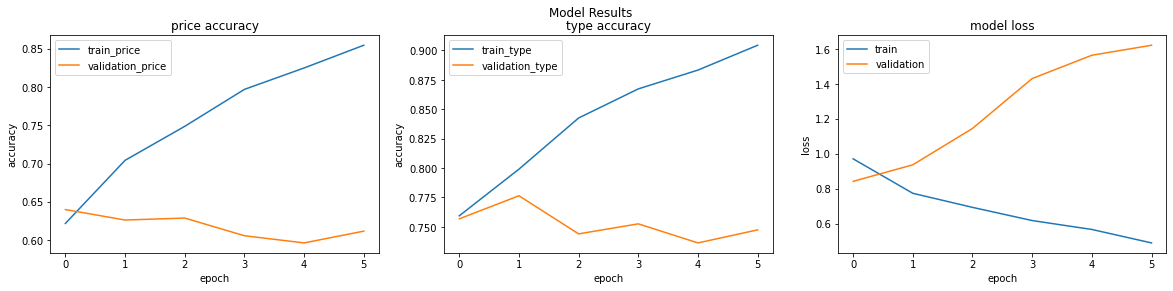

In [41]:
results_viz(history)

In [42]:
# we can do prediction on training set
y_predict_3 = model_3.predict({'summary': x_test_text})

# probabilities
type_predicted_3 = y_predict_3['type']
type_category_predicted_3 = np.argmax(type_predicted_3, axis=1)

price_predicted_3 = y_predict_3['price']
price_category_predicted_3 = np.argmax(price_predicted_3, axis=1)

price_predicted_3,price_category_predicted_3

(array([[1.2567221e-01, 8.7296700e-01, 1.3607141e-03],
        [9.7504264e-01, 2.3371955e-02, 1.5853717e-03],
        [3.5579410e-01, 4.4241697e-01, 2.0178889e-01],
        ...,
        [1.7225718e-01, 8.2595694e-01, 1.7857716e-03],
        [9.9999666e-01, 3.3316437e-06, 5.0008882e-08],
        [3.3240344e-02, 9.6576923e-01, 9.9040521e-04]], dtype=float32),
 array([1, 0, 1, ..., 1, 0, 1]))

Using text data only is decreased the accuracy and it is logical.

As we see here, there 's overfitting too.

##Trial 4
We will use LSTM with text input and multi objective learning.

I expect it'll improve the score because LSTM is very good with text data.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,SpatialDropout1D
import math
from sklearn.metrics import mean_squared_error

In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,LSTM
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense, SpatialDropout1D,Dropout
from keras.layers import SimpleRNN
from keras import regularizers
# here we have one input. one for text.
in_text = keras.Input(batch_shape=(None, max_len))

# text part
# simple average of embedding
embedded = keras.layers.Embedding(tokenizer.num_words, 200)(in_text)
spatial=SpatialDropout1D(0.2)(embedded)
lstm=LSTM(64,dropout=0.2,return_sequences=True)(spatial)
averaged = tf.reduce_mean(lstm, axis=1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(averaged)
p_price = Dense(len_price, activation='softmax', name='price')(averaged)


# define model input/output using keys.
model_4= keras.Model(
    inputs={'summary': in_text},
    outputs={'type': p_type,'price': p_price,})

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model_4.compile(
    optimizer=Adam(lr=0.001),
    loss={'type': 'sparse_categorical_crossentropy','price': 'sparse_categorical_crossentropy'},
    loss_weights={'type': 0.7,'price': 0.3},
    metrics={'type': ['SparseCategoricalAccuracy'],'price': ['SparseCategoricalAccuracy'],}
    )

model_4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 300, 200)     16000000    ['input_6[0][0]']                
                                                                                                  
 spatial_dropout1d_2 (SpatialDr  (None, 300, 200)    0           ['embedding_3[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 lstm_1 (LSTM)                  (None, 300, 64)      67840       ['spatial_dropout1d_2[0][0]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [45]:
history = model_4.fit(
    x={
        'summary': x_train_text_id    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,)],
    verbose=1
)

Epoch 1/30
293/293 [==============================] - 58s 193ms/step - loss: 1.0142 - price_loss: 0.8508 - type_loss: 1.0842 - price_sparse_categorical_accuracy: 0.5962 - type_sparse_categorical_accuracy: 0.7564 - val_loss: 0.9590 - val_price_loss: 0.8402 - val_type_loss: 1.0098 - val_price_sparse_categorical_accuracy: 0.6032 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 2/30
293/293 [==============================] - 57s 193ms/step - loss: 0.9075 - price_loss: 0.8242 - type_loss: 0.9432 - price_sparse_categorical_accuracy: 0.6235 - type_sparse_categorical_accuracy: 0.7587 - val_loss: 0.9291 - val_price_loss: 0.8374 - val_type_loss: 0.9684 - val_price_sparse_categorical_accuracy: 0.6032 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 3/30
293/293 [==============================] - 57s 193ms/step - loss: 0.8805 - price_loss: 0.8226 - type_loss: 0.9053 - price_sparse_categorical_accuracy: 0.6235 - type_sparse_categorical_accuracy: 0.7587 - val_loss: 0.9604 - val_price_loss: 0

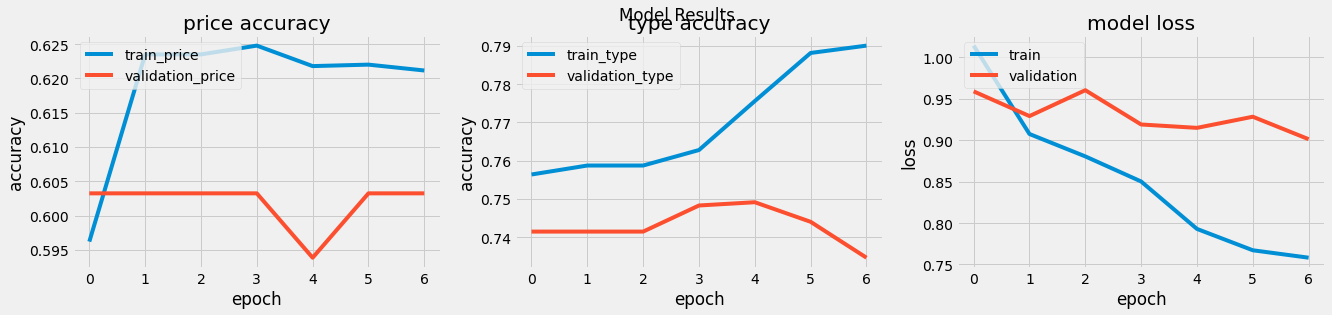

In [46]:
results_viz(history)

In [47]:
# we can do prediction on training set
y_predict_4 = model_4.predict({'summary': x_test_text})

# probabilities
type_predicted_4 = y_predict_4['type']
type_category_predicted_4 = np.argmax(type_predicted_4, axis=1)

price_predicted_4 = y_predict_4['price']
price_category_predicted_4 = np.argmax(price_predicted_4, axis=1)

price_predicted_4,price_category_predicted_4

(array([[0.52024966, 0.39453825, 0.08521208],
        [0.6547472 , 0.2986531 , 0.04659967],
        [0.530274  , 0.39797196, 0.07175407],
        ...,
        [0.65533996, 0.29882836, 0.04583163],
        [0.5300094 , 0.39859813, 0.07139248],
        [0.5363846 , 0.40096056, 0.06265489]], dtype=float32),
 array([0, 0, 0, ..., 0, 0, 0]))

While using LSTM the accuracy is improved but it still overfitting.

##Trial 5
Using image inputs with Conv2d layer and multi objective learning.

In [48]:
# here we have one input. one for image.
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

#images part
cov = Conv2D(32, (8, 8),activation='relu',kernel_regularizer=regularizers.l2(0.01),kernel_initializer='he_uniform')(in_image)
pl = MaxPool2D(pool_size=(8, 8))(cov) 
d1=Dropout(0.25)(pl)
cov2 = Conv2D(64, (4, 4),kernel_regularizer=regularizers.l2(0.01),activation='relu')(d1)
p2 = MaxPool2D((4, 4))(cov2)
d2=Dropout(0.25)(p2)
flattened = Flatten()(d2)



# multi-objectives (each is a multi-class classification) final layers
p_price = Dense(len_price, activation='softmax', name='price')(flattened) #for price c
p_type = Dense(len_type, activation='softmax', name='type')(flattened)    #for type category Output Shape: (None, 24)

# define model input/output using keys.
model_5 = keras.Model(
    inputs={'image': in_image},
    outputs={'type': p_type,'price': p_price,},
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model_5.compile(
    optimizer=Adam(lr=0.001),
    loss={'type': 'sparse_categorical_crossentropy','price': 'sparse_categorical_crossentropy'},
    loss_weights={'type': 0.5,'price': 0.5},
    metrics={'type': ['SparseCategoricalAccuracy'],'price': ['SparseCategoricalAccuracy'],},
    )

model_5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 57, 57, 32)   4128        ['input_7[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 7, 7, 32)    0           ['conv2d_3[0][0]']               
                                                                                                  
 dropout_2 (Dropout)            (None, 7, 7, 32)     0           ['max_pooling2d_3[0][0]']        
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
history = model_5.fit(
    x={
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,)],
    verbose=1
)

Epoch 1/30
293/293 [==============================] - 15s 50ms/step - loss: 2.1661 - price_loss: 1.0306 - type_loss: 2.9684 - price_sparse_categorical_accuracy: 0.6237 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 1.8780 - val_price_loss: 0.9808 - val_type_loss: 2.7690 - val_price_sparse_categorical_accuracy: 0.6032 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 2/30
293/293 [==============================] - 14s 49ms/step - loss: 1.7576 - price_loss: 0.9381 - type_loss: 2.5761 - price_sparse_categorical_accuracy: 0.6237 - type_sparse_categorical_accuracy: 0.7587 - val_loss: 1.6611 - val_price_loss: 0.9177 - val_type_loss: 2.4045 - val_price_sparse_categorical_accuracy: 0.6032 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 3/30
293/293 [==============================] - 14s 49ms/step - loss: 1.5594 - price_loss: 0.8890 - type_loss: 2.2298 - price_sparse_categorical_accuracy: 0.6237 - type_sparse_categorical_accuracy: 0.7587 - val_loss: 1.4867 - val_price_loss: 0.88

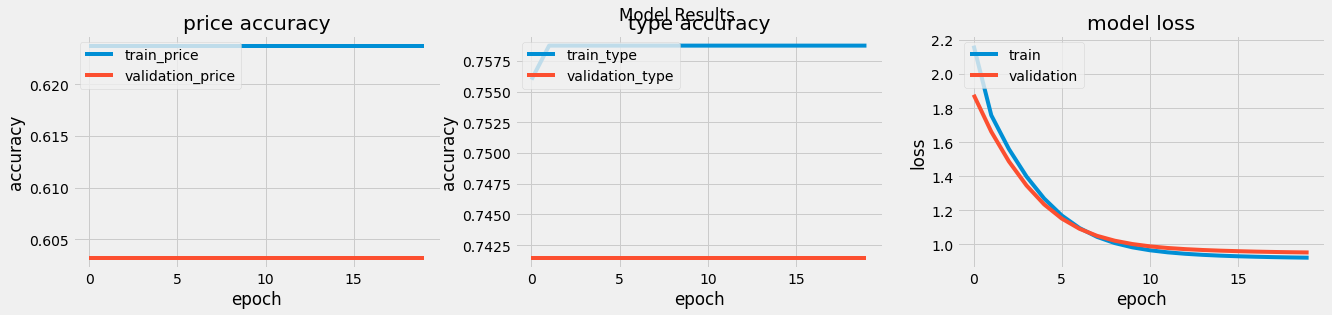

In [50]:
results_viz(history)

In [51]:
# we can do prediction on training set
y_predict_5 = model_5.predict({'image': x_test_image})

# probabilities
type_predicted_5 = y_predict_5['type']
type_category_predicted_5 = np.argmax(type_predicted_5, axis=1)

price_predicted_5 = y_predict_5['price']
price_category_predicted_5 = np.argmax(price_predicted_5, axis=1)

price_predicted_5,price_category_predicted_5

(array([[0.625712  , 0.31250018, 0.06178775],
        [0.625712  , 0.31250018, 0.06178775],
        [0.625712  , 0.31250018, 0.06178775],
        ...,
        [0.625712  , 0.31250018, 0.06178775],
        [0.625712  , 0.31250018, 0.06178775],
        [0.625712  , 0.31250018, 0.06178775]], dtype=float32),
 array([0, 0, 0, ..., 0, 0, 0]))

In [52]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame({'id': test.id,'price': price_category_predicted_5}).to_csv('sample_submission_conv_img_only.csv', index=False)

##Trial 6
We'll use image and text inputs with different hyperparameters and predict multi objective.

In [53]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
attention = MultiHeadAttention(num_heads=2, key_dim=2)(embedded, embedded) # multi-head attention with 2 heads
bi_lstm = Bidirectional(GRU(20, recurrent_regularizer='l2'))(attention)


# image part
cov = Conv2D(64, (3, 3))(in_image) # convolutional layer with 32 filters
drop = Dropout(0.2)(cov) # 20% dropout
pl = MaxPool2D((3, 3))(drop) # max pooling with a 3x3 mask
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
drop2 = Dropout(0.2)(cov2) # 20% dropout
pl2 = MaxPool2D((2,2))(drop2) # max pooling with a 2x2 mask
flattened = Flatten()(pl2) # flatten the shape

# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# define model input/output using keys.
model_6 = keras.Model(
    inputs={'summary': in_text,'image': in_image},
    outputs={'type': p_type,'price': p_price,})

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model_6.compile(
    optimizer=Adam(lr=0.001),
    loss={'type': 'sparse_categorical_crossentropy','price': 'sparse_categorical_crossentropy'},
    loss_weights={'type': 0.7,'price': 0.3},
    metrics={'type': ['SparseCategoricalAccuracy'],'price': ['SparseCategoricalAccuracy'],}
    )

model_6.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 62, 62, 64)   1216        ['input_9[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 62, 62, 64)   0           ['conv2d_5[0][0]']               
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 20, 20, 64)  0           ['dropout_4[0][0]']              
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [54]:
history = model_6.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,)],
    verbose=1
)

Epoch 1/20
293/293 [==============================] - 76s 248ms/step - loss: 1.1362 - price_loss: 0.8533 - type_loss: 1.1069 - price_sparse_categorical_accuracy: 0.6163 - type_sparse_categorical_accuracy: 0.7568 - val_loss: 1.0550 - val_price_loss: 0.8460 - val_type_loss: 1.1314 - val_price_sparse_categorical_accuracy: 0.6032 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 2/20
293/293 [==============================] - 72s 246ms/step - loss: 0.8923 - price_loss: 0.8207 - type_loss: 0.9174 - price_sparse_categorical_accuracy: 0.6244 - type_sparse_categorical_accuracy: 0.7624 - val_loss: 0.9352 - val_price_loss: 0.8438 - val_type_loss: 0.9706 - val_price_sparse_categorical_accuracy: 0.6015 - val_type_sparse_categorical_accuracy: 0.7457
Epoch 3/20
293/293 [==============================] - 72s 245ms/step - loss: 0.8251 - price_loss: 0.8003 - type_loss: 0.8332 - price_sparse_categorical_accuracy: 0.6284 - type_sparse_categorical_accuracy: 0.7690 - val_loss: 0.9539 - val_price_loss: 0

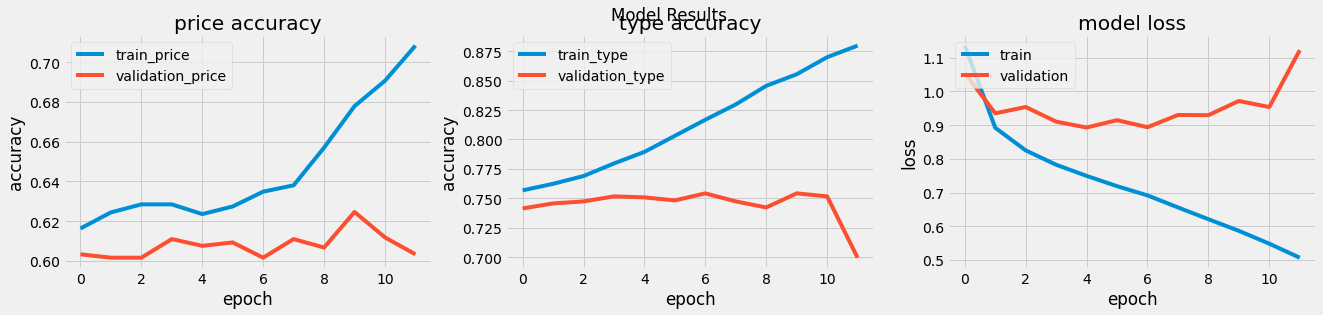

In [55]:
results_viz(history)

In [56]:
# we can do prediction on training set
y_predict_6 = model_6.predict({'summary': x_test_text,'image': x_test_image})

# probabilities
type_predicted_6 = y_predict_6['type']
type_category_predicted_6 = np.argmax(type_predicted_6, axis=1)

price_predicted_6 = y_predict_6['price']
price_category_predicted_6 = np.argmax(price_predicted_6, axis=1)
price_predicted_6,price_category_predicted_6

(array([[0.9286079 , 0.06458138, 0.00681069],
        [0.9851746 , 0.01348079, 0.00134458],
        [0.9091669 , 0.08096138, 0.00987179],
        ...,
        [0.9782824 , 0.02036184, 0.00135584],
        [0.8582725 , 0.12526612, 0.01646133],
        [0.94053507, 0.05299987, 0.00646513]], dtype=float32),
 array([0, 0, 0, ..., 0, 0, 0]))

In [57]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame({'id': test.id,'price': price_category_predicted_6}).to_csv('sample_submission_model6.csv', index=False)

##Conclusion

As we see, using multi modality learning improves accuracy because we make model see diffrent types of data like we have here (texts,images) and it helps model to make strong decision.
Secondly, increasing number of epochs, makes model take long time in training but it gives the model chance to learn more and adding EarlyStoping Function help to stop overfitting.
And decreasing batch size is good for the model but it will take much time to learn too.

##Problem Formulation


###The Problem is:

One of the biggest problems when people prepare to post a new listing on airbnb is, how much should one ask for? Of course the most intuitive way is to check how other similar postings price their apartment/house. So in this assignment, we are going to predict the listing price based on the listing characteristics, in this way to optimize user experience and lower the bar to be a new host.

###What is the input?

*   Summary: with text data
*   Images: with images data


###What is the output?



*   Type
*   Price




###What data mining function is required?



*   Load and Clean the data
*   Lemmatizer function
*   Tokenizer function
*   StopWords function
*   Fill nulls function



###What could be the challenges?


Selecting best hyperparameters that fit this model and clean data because data contains french language and english too we should handle it.

###What is the impact?


Model helps users to find the price for their new listing based on the listing characteristics.

###What is an ideal solution?


Using multimodality with one objective.

###What is the experimental protocol used and how was it carried out?


Using Multi-modality learning and Multi-objective learning.

It was the first time to use multi objective and multi modality.

We used LSTM, RNN, GRU and CONV2D models and tried to use best hyperparameters that fit each one of them.

We selected the learning rate and optimizer then set epochs with earlystop function to reduce overfitting.

###How did we tune hyper-parameters in the template? 

We'll change in number of epochs, batch size, and size of the hold-out set for validation then follow the loss and accuracy and select the hyperparameters depend on them.

###What is the search space and what is the criteria to determine good/bad hyper-parameters?

The search space is defined by the range of values for each parameter in a parameter grid. The criteria used to identify good/bad hyperparameters is the performance metric or loss function, where good hyperparameters improve the performance.

##Questions

###🌈Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

No, It is not a good model for the sequential data as it fails to incorporate the memory dependence. Also it is limited to fixed length. 

No, It is not good for images, in images it will have many weights in first layer and having so many parameters will result in overfitting.

###🌈What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

Gradient vanishing means that the gradient is too near to zero cause of wieghts value is too small, but explosion is mean the gradient is too large cause of gradient value is larger than 1.

GRU and LSTM solve this problem by adding gates to decide what is the ratio that we need to take from each feature and it changes in the way of computing.

###🌈What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?

Multi-objective learning is a machine learning paradigm wherein multiple tasks are solved at the same time to take advantage similarities across multiple learning tasks.

Multi-modality learning is used to create a joint statistical representation of a task or process using different modalities or types of media.

We used both of them in this assignment, we are carrying out two multi-class classification tasks on both the type of listing, and the price range of the rental listing. Multi-modality learning is used in this assignment to combine the listing summary with an image of the property that is listed to build a joint representation of the listing when training a model.

###🌈What is the difference among xgboost, lightgbm and catboost


LightGBM uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the data instances for finding a split value while XGBoost uses pre-sorted algorithm & Histogram-based algorithm for computing the best split.

CatBoost tree can predict extra ordinarily faster than either XGBoost or LightGBM.
